In [61]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns

In [96]:
data= pd.read_csv('./data/titanic-passengers.csv', sep=';')

In [97]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,NaN,C
888,535,No,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,NaN,S
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,NaN,0,0,349215,7.8958,NaN,S


<AxesSubplot:>

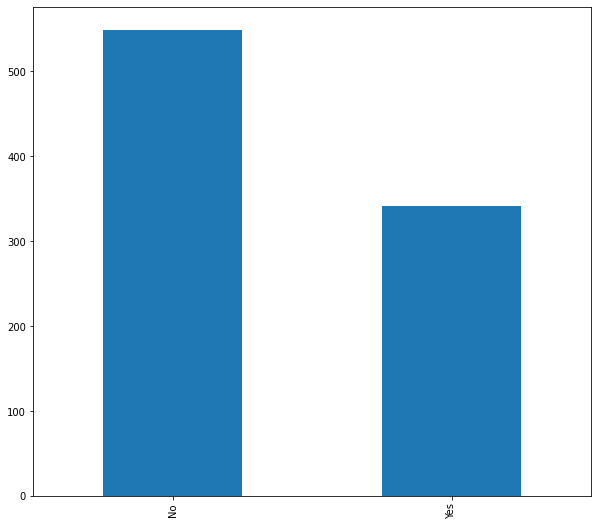

In [98]:
data.Survived.value_counts().plot(kind='bar', figsize=(10,9))

<BarContainer object of 2 artists>

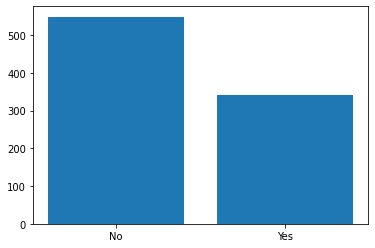

In [99]:
import matplotlib.pyplot as plt

plt.bar(data.Survived.value_counts().index, data.Survived.value_counts())

# Missing value

<AxesSubplot:>

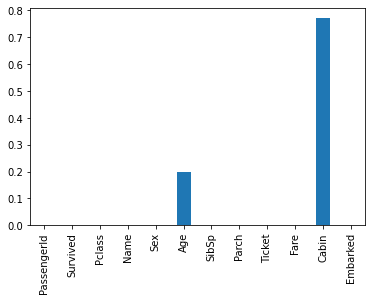

In [100]:
(data.isnull().sum()/data.shape[0]).plot(kind='bar')

# Dropping Cabin

# Age

<AxesSubplot:ylabel='Frequency'>

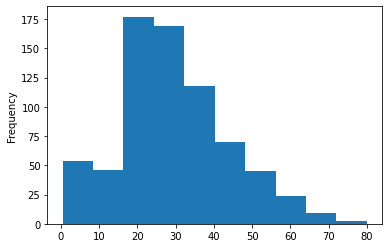

In [101]:
data.Age.plot(kind='hist')

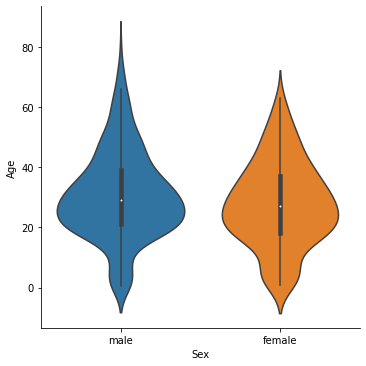

In [63]:
 sns.catplot(x="Sex", y="Age",

               data=data, kind="violin")

/home/aleks/miniconda3/envs/ai37/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

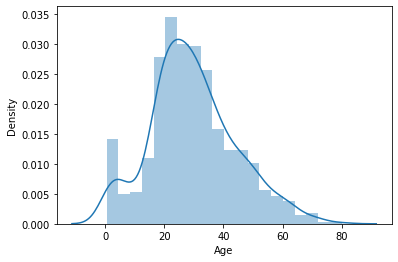

In [76]:
sns.distplot(data.Age)

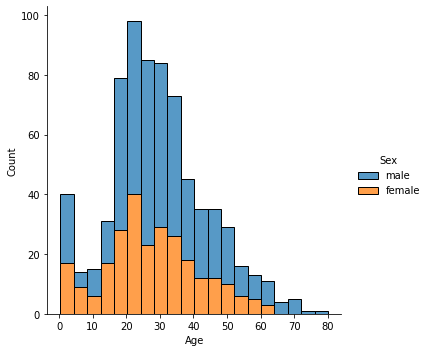

In [84]:
sns.displot(multiple="stack",x='Age',hue='Sex',data=data)

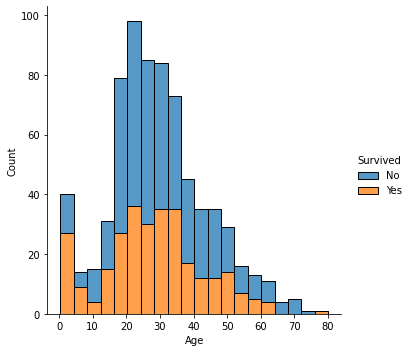

In [77]:
sns.displot(multiple="stack",x='Age',hue='Survived',data=data)

In [86]:
data.groupby(['Survived', 'Sex', 'Age']).count().reset_index()

,Survived,Sex,Age,PassengerId,Pclass,Name,SibSp,Parch,Ticket,Fare,Embarked
0,No,female,2.0,4,4,4,4,4,4,4,4
1,No,female,3.0,1,1,1,1,1,1,1,1
2,No,female,6.0,1,1,1,1,1,1,1,1
3,No,female,8.0,1,1,1,1,1,1,1,1
4,No,female,9.0,4,4,4,4,4,4,4,4
...,...,...,...,...,...,...,...,...,...,...,...
211,Yes,male,52.0,1,1,1,1,1,1,1,1
212,Yes,male,56.0,1,1,1,1,1,1,1,1
213,Yes,male,60.0,1,1,1,1,1,1,1,1
214,Yes,male,62.0,1,1,1,1,1,1,1,1


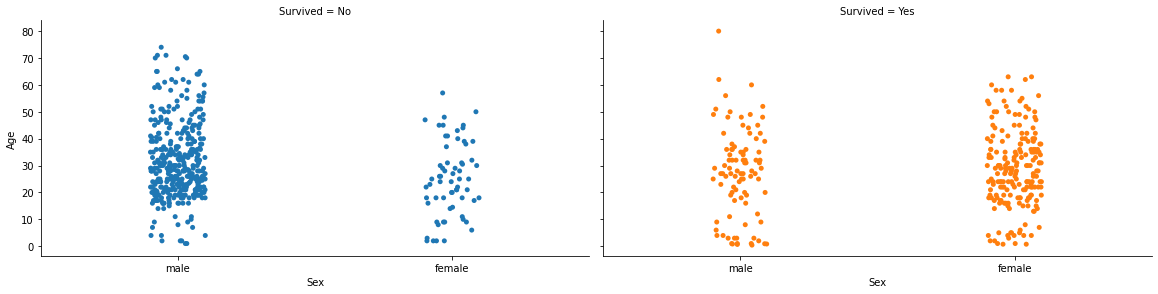

In [94]:

sns.catplot(x="Sex", y="Age",

                hue="Survived", col='Survived',

                data=data, kind="strip",

                height=4, aspect=2);

#TODO: comment the graph


# Tiket( to delete)

In [103]:
data.Ticket

0          248740
1          348123
2          350050
3          349909
4      F.C. 12750
          ...    
886        237736
887          2669
888        315084
889        349215
890        250655
Name: Ticket, Length: 891, dtype: object

<AxesSubplot:>

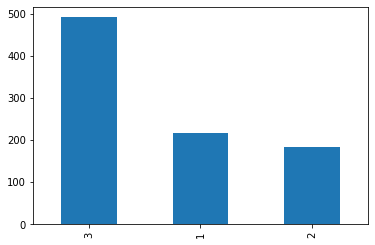

In [110]:
data.Pclass.value_counts().plot(kind="bar")

In [95]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [117]:
data= pd.read_csv('./data/titanic-passengers.csv', sep=';')
to_delete=["PassengerId",'Name', 'Ticket', 'Cabin']
data.drop(to_delete, axis=1, inplace=True)

In [118]:
cat_feat=['Pclass','Sex','Embarked']
num_feat=['SibSp', 'Parch','Fare']


In [ ]:


from sklearn.compose import ColumnTransformer

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder,LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor, RandomForestRegressor,AdaBoostRegressor
from sklearn.linear_model import LogisticRegression,LinearRegression,Lasso,BayesianRidge,ElasticNet,Ridge,SGDRegressor 

from sklearn.decomposition import PCA, NMF, TruncatedSVD
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as PipImb
from sklearn.model_selection import KFold,GridSearchCV,learning_curve,RepeatedKFold
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score,TimeSeriesSplit,StratifiedKFold,RepeatedKFold
from sklearn.metrics import mean_absolute_error,mean_squared_error

from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import LinearSVR
from sklearn.cluster import KMeans


In [129]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder,LabelEncoder
from xgboost.sklearn import XGBClassifier


In [140]:
def  pipelinen(df,model, cat_feature, num_feature):
    numeric_transformer = Pipeline(
         steps=[
             ('imputer', SimpleImputer(strategy='median')),
             ('scaler', StandardScaler())]
    )
    categorical_transformer = Pipeline(steps=[
             ('imputer', SimpleImputer(strategy='most_frequent')),
             ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])
    preprocessor = ColumnTransformer(
             transformers=[
                 ('num', numeric_transformer, num_feature),
                 ('cat', categorical_transformer, cat_feature)
             ])

        # Append classifier to preprocessing pipeline.
        # Now we have a full prediction pipeline.
    clf = Pipeline(steps=[
         ('preprocessor', preprocessor),
#                                   ('reduce_dim', TruncatedSVD(n_components=500)),
                                  ('model', model),
                                
                             ])
    return clf

In [141]:
Y=data.Survived
X=data.drop('Survived', axis=1)

clf=pipelinen(data, XGBClassifier(),  cat_feat, num_feat)

In [142]:
clf.fit(X,Y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['SibSp', 'Parch', 'Fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Pcl

In [156]:
clf.steps[0][1].transformers

[('num',
  Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                  ('scaler', StandardScaler())]),
  ['SibSp', 'Parch', 'Fare']),
 ('cat',
  Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                  ('onehot', OneHotEncoder(handle_unknown='ignore'))]),
  ['Pclass', 'Sex', 'Embarked'])]

In [143]:
pd.DataFrame(clf.transform(X))

AttributeError: 'XGBClassifier' object has no attribute 'transform'

In [157]:
clf.predict(X)

array(['No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'No',
       'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Yes',
       'No', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No',
       'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'No',
       'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Yes',
       'Yes', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No',
       'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes',
       'Yes', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'No',
       'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'N